# feature extraction test

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display

In [2]:
#load data
assets = r"D:\z_Downloads\Datenset_Zauberfloete\data"
name = "WAM-79__Track2_Channel1.wav" #WAM-29__Track2_Channel1.wav

sampleRate = 22050
offset = 0 #63
duration = 15 #20 seconds
figTitle = name +" (" + str(offset) + "s - " + str(offset + duration) + "s)"

path = assets + "\\" + name
data, sr = librosa.load(path= path, sr= sampleRate, offset= offset, duration= duration)
oSr = librosa.get_samplerate(path)

print("file: \t\t\t%s"% (name))
print("duration: \t\t%is"% (duration))
print("original sample rate: \t%i" % (oSr))
print("loaded sample rate: \t%i" % (sr))
print("data array dim: \t%i" % (data.ndim))
print("data array size: \t%i" % (len(data)))
print("check (%i * %s): \t%i (%s)" % (duration, sr, duration * sr, duration*sr == len(data)))

file: 			WAM-79__Track2_Channel1.wav
duration: 		15s
original sample rate: 	48000
loaded sample rate: 	22050
data array dim: 	1
data array size: 	330750
check (15 * 22050): 	330750 (True)


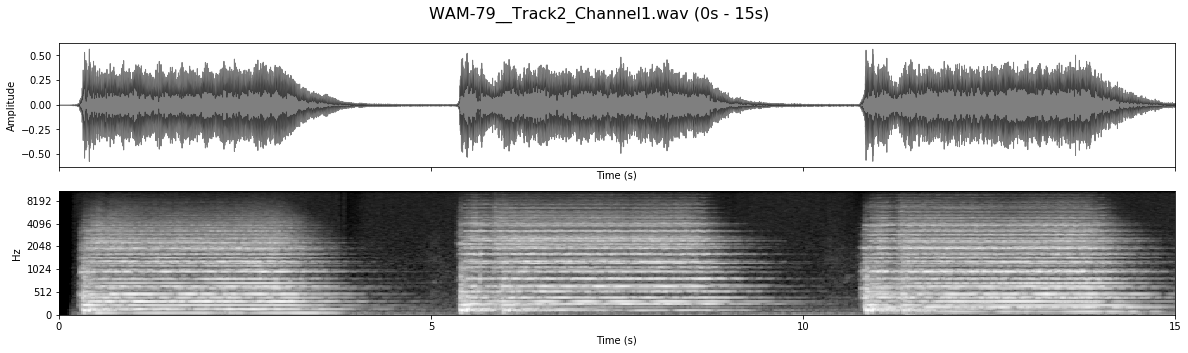

In [36]:
#visualization
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(20,5))
fig.suptitle(figTitle, size=16)
fig.subplots_adjust(hspace = 0.2)


ax[0].set(ylabel="Amplitude")
librosa.display.waveplot(y=data, sr=sr, x_axis='s', color='black', alpha = 0.5, ax=ax[0])

S = librosa.feature.melspectrogram(y=data, sr=sr)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='s', y_axis='mel', cmap='gray', sr=sr, ax=ax[1])

In [4]:
#feature extraction
hopLength = 512
chroma_stft = librosa.feature.chroma_stft(data, sr=sampleRate, hop_length=hopLength)
chroma_cq = librosa.feature.chroma_cqt(data, sr=sampleRate, hop_length=hopLength)
chroma_cens = librosa.feature.chroma_cens(data, sr=sampleRate, hop_length=hopLength)

print("file: \t\t%s"% (figTitle))
print("data arr size: \t%i" % (len(data)))
print("hop length: \t%s"% (hopLength))

print("chroma_stft: \t(%i semitones, %i features) -> %i * %i = %i" % (len(chroma_stft), len(chroma_stft[0]), hopLength, len(chroma_stft[0]), len(chroma_stft[0])*hopLength))
print("chroma_cq: \t(%i semitones, %i features) -> %i * %i = %i" % (len(chroma_cq), len(chroma_cq[0]), hopLength, len(chroma_cq[0]), len(chroma_cq[0])*hopLength))
print("chroma_cens: \t(%i semitones, %i features) -> %i * %i = %i" % (len(chroma_cens), len(chroma_cens[0]), hopLength, len(chroma_cens[0]), len(chroma_cens[0])*hopLength))


file: 		WAM-79__Track2_Channel1.wav (0s - 15s)
data arr size: 	330750
hop length: 	512
chroma_stft: 	(12 semitones, 646 features) -> 512 * 646 = 330752
chroma_cq: 	(12 semitones, 646 features) -> 512 * 646 = 330752
chroma_cens: 	(12 semitones, 646 features) -> 512 * 646 = 330752


In [5]:
330750/512

645.99609375

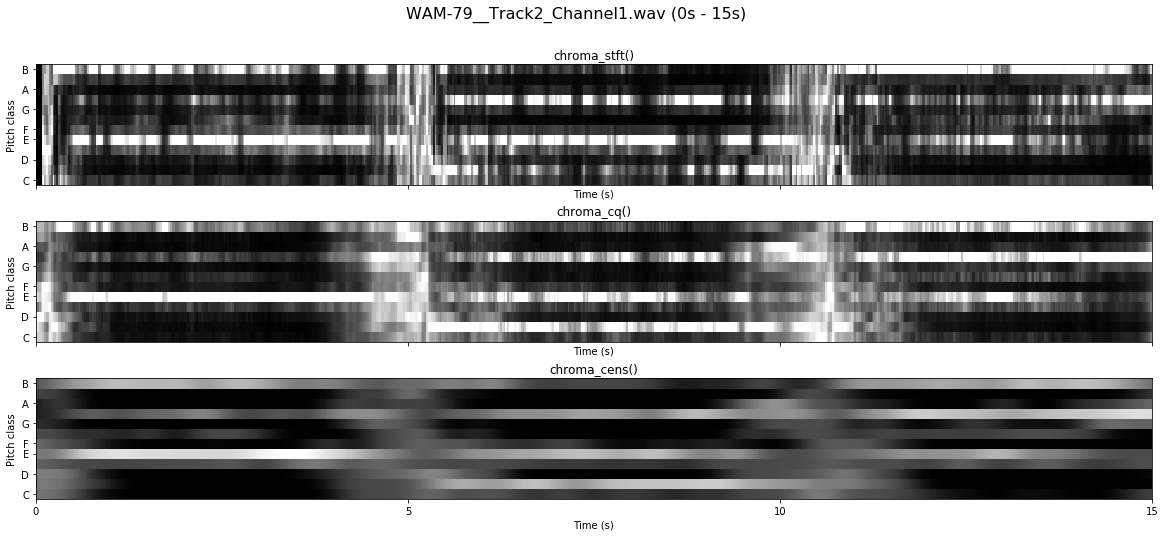

In [39]:
#visualization
fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True, figsize=(20,8))
fig.suptitle(figTitle, size=16)

img = librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='s', cmap='gray',  ax=ax[0])
ax[0].set(title='chroma_stft()')
librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='s', cmap='gray',  ax=ax[1])
ax[1].set(title='chroma_cq()')
librosa.display.specshow(chroma_cens, y_axis='chroma', x_axis='s', cmap='gray',  ax=ax[2])
ax[2].set(title='chroma_cens()')

fig.subplots_adjust(hspace = 0.3)
#fig.colorbar(img, ax=ax)

[Text(0.5, 1.0, 'chroma_cens(tuning = 3)')]

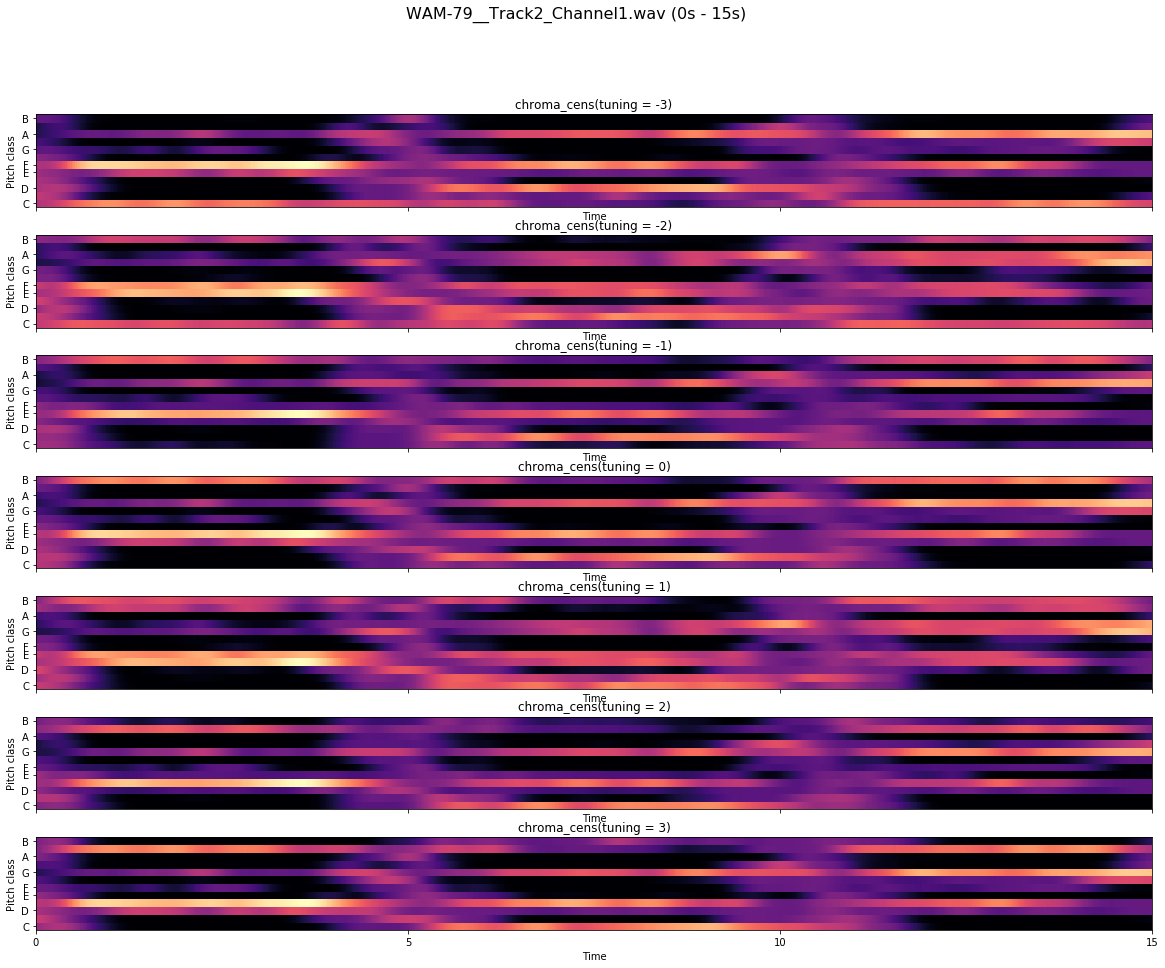

In [7]:
#tuning test
t0 = -3 #one semitone ~3 tuning
t1 = -2
t2 = -1
t3 = 0
t4 = 1 
t5 = 2
t6 = 3
chroma_cens_t0 = librosa.feature.chroma_cens(data, sr=sampleRate, tuning= t0)
chroma_cens_t1 = librosa.feature.chroma_cens(data, sr=sampleRate, tuning= t1)
chroma_cens_t2 = librosa.feature.chroma_cens(data, sr=sampleRate, tuning= t2)
chroma_cens_t3 = librosa.feature.chroma_cens(data, sr=sampleRate, tuning= t3)
chroma_cens_t4 = librosa.feature.chroma_cens(data, sr=sampleRate, tuning= t4)
chroma_cens_t5 = librosa.feature.chroma_cens(data, sr=sampleRate, tuning= t5)
chroma_cens_t6 = librosa.feature.chroma_cens(data, sr=sampleRate, tuning= t6)

#visualization
fig, ax = plt.subplots(nrows=7, sharex=True, sharey=True, figsize=(20,15))
fig.suptitle(figTitle, size=16)
fig.subplots_adjust(hspace = 0.3)

librosa.display.specshow(chroma_cens_t0, y_axis='chroma', x_axis='time', ax=ax[0])
ax[0].set(title='chroma_cens(tuning = ' + str(t0) + ')')
librosa.display.specshow(chroma_cens_t1, y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(title='chroma_cens(tuning = ' + str(t1) + ')')
librosa.display.specshow(chroma_cens_t2, y_axis='chroma', x_axis='time', ax=ax[2])
ax[2].set(title='chroma_cens(tuning = ' + str(t2) + ')')
librosa.display.specshow(chroma_cens_t3, y_axis='chroma', x_axis='time', ax=ax[3])
ax[3].set(title='chroma_cens(tuning = ' + str(t3) + ')')
librosa.display.specshow(chroma_cens_t4, y_axis='chroma', x_axis='time', ax=ax[4])
ax[4].set(title='chroma_cens(tuning = ' + str(t4) + ')')
librosa.display.specshow(chroma_cens_t5, y_axis='chroma', x_axis='time', ax=ax[5])
ax[5].set(title='chroma_cens(tuning = ' + str(t5) + ')')
librosa.display.specshow(chroma_cens_t6, y_axis='chroma', x_axis='time', ax=ax[6])
ax[6].set(title='chroma_cens(tuning = ' + str(t6) + ')')